# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [28]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [29]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [30]:
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill + 1', tips[:5])
X

DesignMatrix with shape (5, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'smoker' (column 2)
    'time' (column 3)
    'net_bill' (column 4)

In [31]:
y

DesignMatrix with shape (5, 1)
   tip
  1.01
  1.66
  3.50
  3.31
  3.61
  Terms:
    'tip' (column 0)

In [32]:
reg = smf.ols('tip ~ sex + smoker + time + net_bill + 1', data = tips).fit()


In [33]:
tips['res'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           2.64e-20
Time:                        09:24:55   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
y, X = patsy.dmatrices('tip ~ net_bill + 1', tips[:5])
X

DesignMatrix with shape (5, 2)
  Intercept  net_bill
          1     15.98
          1      8.68
          1     17.51
          1     20.37
          1     20.98
  Terms:
    'Intercept' (column 0)
    'net_bill' (column 1)

In [35]:
reg = smf.ols('tip ~ net_bill + 1', data = tips).fit()

In [36]:
tips['res'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           5.02e-23
Time:                        09:24:57   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

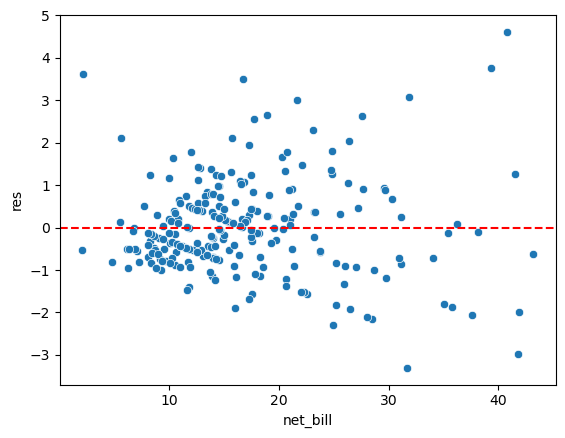

In [37]:
sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [38]:
y, X = patsy.dmatrices('tip ~ np.log(net_bill) + 1', tips[:5])
X

DesignMatrix with shape (5, 2)
  Intercept  np.log(net_bill)
          1           2.77134
          1           2.16102
          1           2.86277
          1           3.01406
          1           3.04357
  Terms:
    'Intercept' (column 0)
    'np.log(net_bill)' (column 1)

In [53]:
reg = smf.ols('tip ~ np.log(net_bill) + 1', data = tips).fit()
tips['res_log'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           4.40e-20
Time:                        09:25:49   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

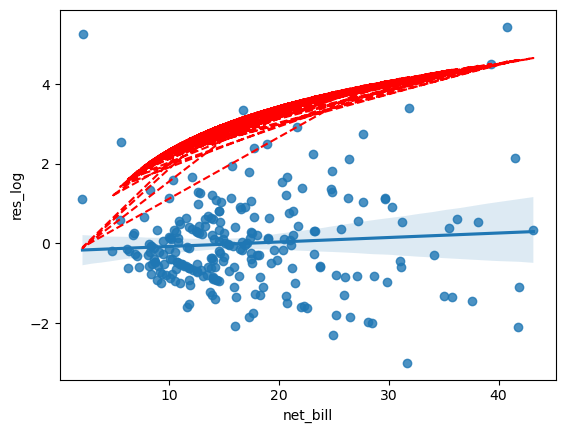

In [54]:
sns.regplot(x = 'net_bill', y = 'res_log', data = tips)
plt.plot(tips['net_bill'], reg.fittedvalues, 'r,--')

In [40]:
y, X = patsy.dmatrices('tip ~ I(net_bill + np.power(net_bill,2)) + 1', tips[:5])
X

DesignMatrix with shape (5, 2)
  Intercept  I(net_bill + np.power(net_bill, 2))
          1                             271.3404
          1                              84.0224
          1                             324.1101
          1                             435.3069
          1                             461.1404
  Terms:
    'Intercept' (column 0)
    'I(net_bill + np.power(net_bill, 2))' (column 1)

In [41]:
reg = smf.ols('tip ~ I(net_bill + np.power(net_bill,2)) + 1', data = tips).fit()
tips['res_log'] = reg.resid

reg.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     104.6
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           1.22e-20
Time:                        09:25:00   Log-Likelihood:                -381.12
No. Observations:                 244   AIC:                             766.2
Df Residuals:                     242   BIC:                             773.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               2.2360      0.105     21.267      0.000       2.029       2.443
I(net_bill + np.power(net_bill, 2))     0.0021      0.000     10.228      0.000       0.002       0.003
==============================================================================
Omnibus:                       22.881   Durbin-Watson:                   2.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.771
Skew:                           0.621   Prob(JB):                     1.26e-07
Kurtosis:                       4.258   Cond. No.                         726.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

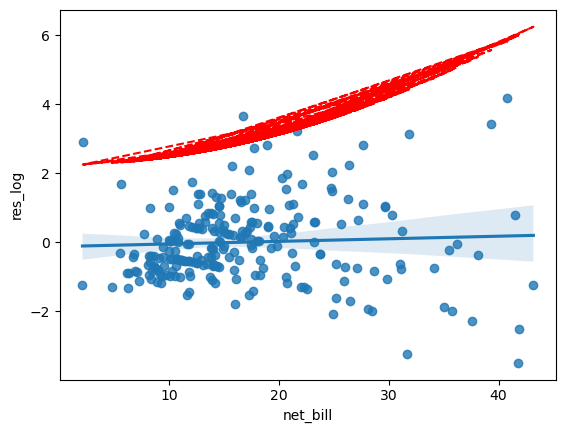

In [42]:
sns.regplot(x = 'net_bill', y = 'res_log', data = tips)
plt.plot(tips['net_bill'], reg.fittedvalues, 'r,--')

Quando utilizamos a regressão por polinômio o R² apresenta um aumento, evidenciando a melhor escolha.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [43]:
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill + 1', tips[:5])
X

DesignMatrix with shape (5, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'smoker' (column 2)
    'time' (column 3)
    'net_bill' (column 4)

In [44]:
y

DesignMatrix with shape (5, 1)
  np.log(tip)
      0.00995
      0.50682
      1.25276
      1.19695
      1.28371
  Terms:
    'np.log(tip)' (column 0)

In [45]:
reg = smf.ols('np.log(tip) ~ sex + smoker + time + net_bill + 1', data = tips).fit()
tips['res_log'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           1.21e-18
Time:                        09:25:04   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
reg = smf.ols('np.log(tip) ~ net_bill + 1', data = tips).fit()
tips['res_log'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           2.60e-21
Time:                        09:25:05   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.000       0.388       0.601
net_bill       0.0303      0.003     10.442      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.865   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.502
Skew:                          -0.215   Prob(JB):                        0.286
Kurtosis:                       3.248   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

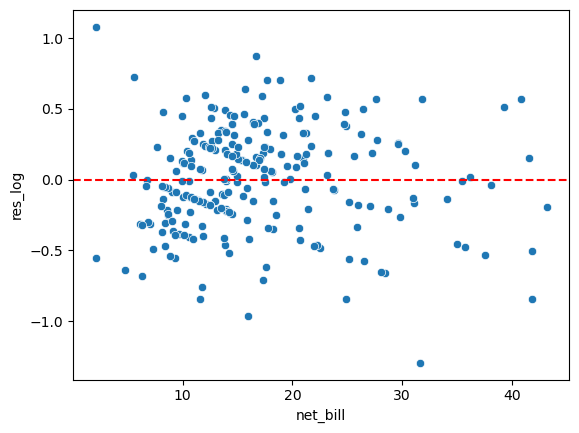

In [47]:
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [48]:
reg = smf.ols('np.log(tip) ~ np.log(net_bill) + 1', data = tips).fit()
tips['res_log'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           5.62e-22
Time:                        09:25:06   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133     -2.961      0.003      -0.657      -0.132
np.log(net_bill)     0.5151      0.048     10.652      0.000       0.420       0.610
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

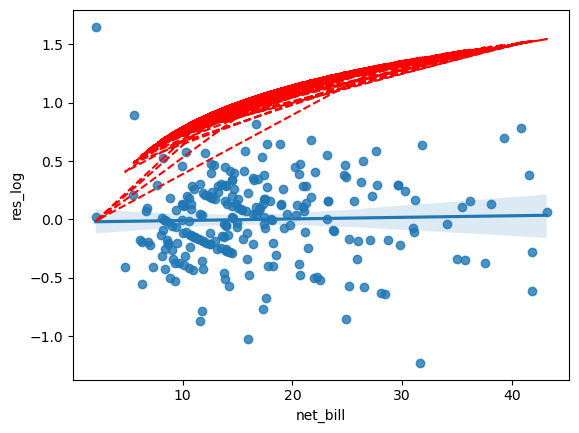

In [49]:
sns.regplot(x = 'net_bill', y = 'res_log', data = tips)
plt.plot(tips['net_bill'], reg.fittedvalues, 'r,--')

In [50]:
reg = smf.ols('np.log(tip) ~ I(net_bill + np.power(net_bill,2)) + 1', data = tips).fit()
tips['res_log'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     81.37
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           5.92e-17
Time:                        09:25:21   Log-Likelihood:                -107.90
No. Observations:                 244   AIC:                             219.8
Df Residuals:                     242   BIC:                             226.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.7831      0.034     22.823      0.000       0.716       0.851
I(net_bill + np.power(net_bill, 2))     0.0006    6.7e-05      9.020      0.000       0.000       0.001
==============================================================================
Omnibus:                        2.460   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.292   Jarque-Bera (JB):                2.493
Skew:                          -0.240   Prob(JB):                        0.288
Kurtosis:                       2.880   Cond. No.                         726.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

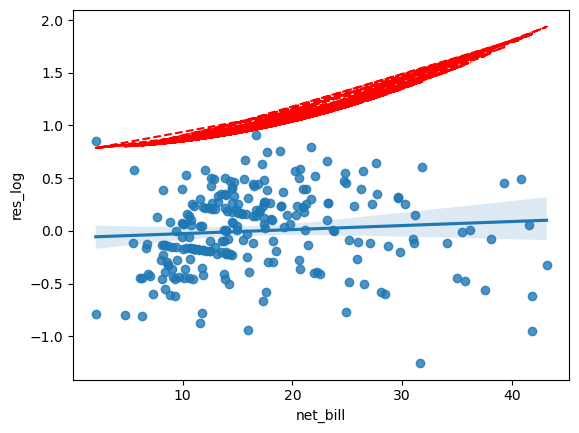

In [51]:
sns.regplot(x = 'net_bill', y = 'res_log', data = tips)
plt.plot(tips['net_bill'], reg.fittedvalues, 'r,--')

Quando utilizamos a regressão por log o R² apresenta um aumento, evidenciando a melhor escolha.

In [52]:
tips['pred_y'] = np.exp(reg.fittedvalues)

tips[['pred_y', 'tip']].corr().iloc[0,1]**2

0.268662780448151

O R² calculado no item 2 é de 26,87% contra 25,2% do item 1, logo o item 2 é mais eficiente.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [129]:
previsao_de_renda = pd.read_csv('previsao_de_renda.csv')
previsao_de_renda.head(50)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
5,5,2015-01-01,10581,F,False,True,0,Assalariado,Superior completo,Casado,Casa,39,4.345205,2.0,1445.87
6,6,2015-01-01,7129,F,False,True,0,Empresário,Superior completo,Viúvo,Casa,55,6.378082,1.0,1726.03
7,7,2015-01-01,9952,F,False,True,0,Empresário,Secundário,Casado,Casa,36,3.104110,2.0,2515.98
8,8,2015-01-01,883,F,False,True,0,Assalariado,Secundário,Casado,Casa,50,18.605479,2.0,3420.34
9,9,2015-01-01,8070,M,True,True,0,Assalariado,Superior completo,Casado,Casa,60,10.558904,2.0,12939.14


In [130]:
previsao_de_renda = previsao_de_renda.dropna()


In [131]:
previsao_de_renda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12427 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             12427 non-null  int64  
 1   data_ref               12427 non-null  object 
 2   id_cliente             12427 non-null  int64  
 3   sexo                   12427 non-null  object 
 4   posse_de_veiculo       12427 non-null  bool   
 5   posse_de_imovel        12427 non-null  bool   
 6   qtd_filhos             12427 non-null  int64  
 7   tipo_renda             12427 non-null  object 
 8   educacao               12427 non-null  object 
 9   estado_civil           12427 non-null  object 
 10  tipo_residencia        12427 non-null  object 
 11  idade                  12427 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  12427 non-null  float64
 14  renda                  12427 non-null  float64
dtypes:

In [132]:
y, X = patsy.dmatrices('renda ~ sexo + posse_de_imovel + tempo_emprego + posse_de_veiculo + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + qt_pessoas_residencia + 1', previsao_de_renda[:5])
X

DesignMatrix with shape (5, 13)
  Columns:
    ['Intercept',
     'sexo[T.M]',
     'posse_de_imovel[T.True]',
     'posse_de_veiculo[T.True]',
     'tipo_renda[T.Empresário]',
     'tipo_renda[T.Servidor público]',
     'educacao[T.Superior completo]',
     'estado_civil[T.Solteiro]',
     'tipo_residencia[T.Governamental]',
     'tempo_emprego',
     'qtd_filhos',
     'idade',
     'qt_pessoas_residencia']
  Terms:
    'Intercept' (column 0)
    'sexo' (column 1)
    'posse_de_imovel' (column 2)
    'posse_de_veiculo' (column 3)
    'tipo_renda' (columns 4:6)
    'educacao' (column 6)
    'estado_civil' (column 7)
    'tipo_residencia' (column 8)
    'tempo_emprego' (column 9)
    'qtd_filhos' (column 10)
    'idade' (column 11)
    'qt_pessoas_residencia' (column 12)
  (to view full data, use np.asarray(this_obj))

In [133]:
y

DesignMatrix with shape (5, 1)
    renda
  8060.34
  1852.15
  2253.89
  6600.77
  6475.97
  Terms:
    'renda' (column 0)

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:28:40   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409

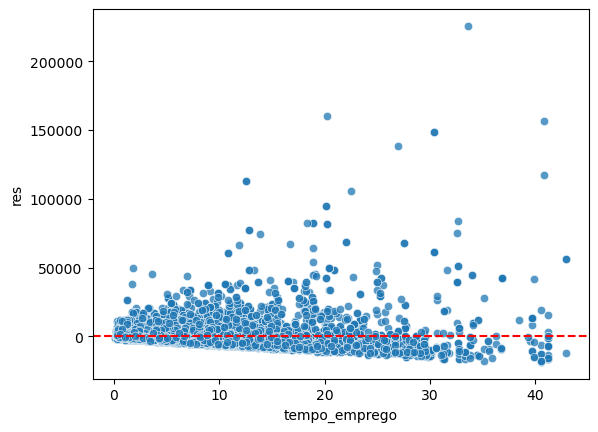

In [151]:
reg = smf.ols('renda ~ tempo_emprego', data = previsao_de_renda).fit()
print(reg.summary())
previsao_de_renda['res'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = previsao_de_renda, alpha = .75 )
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1116.
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:28:41   Log-Likelihood:            -1.2960e+05
No. Observations:               12427   AIC:                         2.592e+05
Df Residuals:                   12424   BIC:                         2.592e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

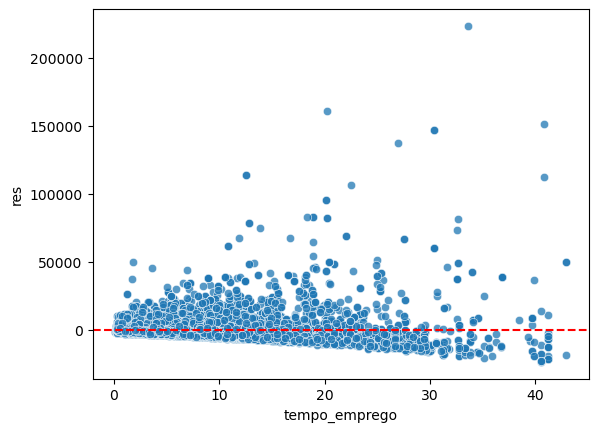

In [152]:
reg = smf.ols('renda ~ tempo_emprego + np.power(tempo_emprego,2)', data = previsao_de_renda).fit()
print(reg.summary())
previsao_de_renda['res'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = previsao_de_renda, alpha = .75 )
plt.axhline(y=0, color='r', linestyle='--')

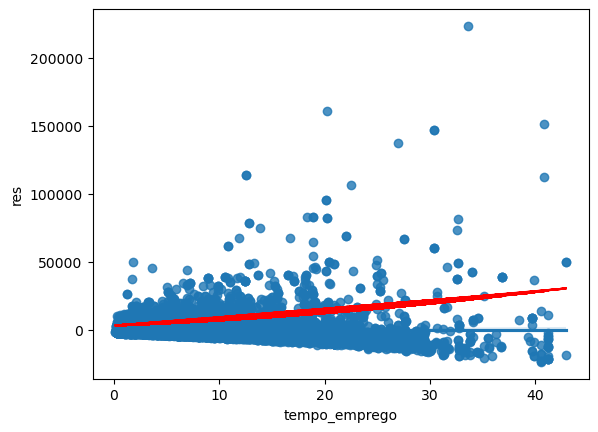

In [153]:
sns.regplot(x = 'tempo_emprego', y = 'res', data = previsao_de_renda)
plt.plot(previsao_de_renda['tempo_emprego'], reg.fittedvalues, 'r,--')

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     1250.
Date:                Thu, 13 Apr 2023   Prob (F-statistic):          5.60e-261
Time:                        11:27:20   Log-Likelihood:            -1.3003e+05
No. Observations:               12427   AIC:                         2.601e+05
Df Residuals:                   12425   BIC:                         2.601e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1725.24

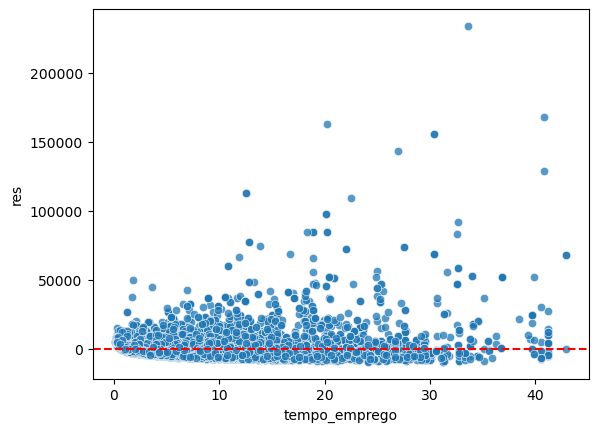

In [148]:
reg = smf.ols('renda ~ np.log(tempo_emprego)', data = previsao_de_renda).fit()
print(reg.summary())
previsao_de_renda['res'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = previsao_de_renda, alpha = .75 )
plt.axhline(y=0, color='r', linestyle='--')

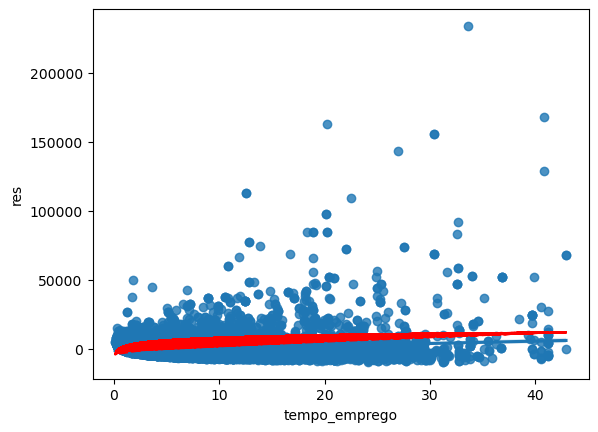

In [150]:
sns.regplot(x = 'tempo_emprego', y = 'res', data = previsao_de_renda)
plt.plot(previsao_de_renda['tempo_emprego'], reg.fittedvalues, 'r,--')

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                      -0.451
Model:                            OLS   Adj. R-squared:                 -0.451
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 13 Apr 2023   Prob (F-statistic):                nan
Time:                        11:30:07   Log-Likelihood:            -1.3294e+05
No. Observations:               12427   AIC:                         2.659e+05
Df Residuals:                   12426   BIC:                         2.659e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              8.682e-

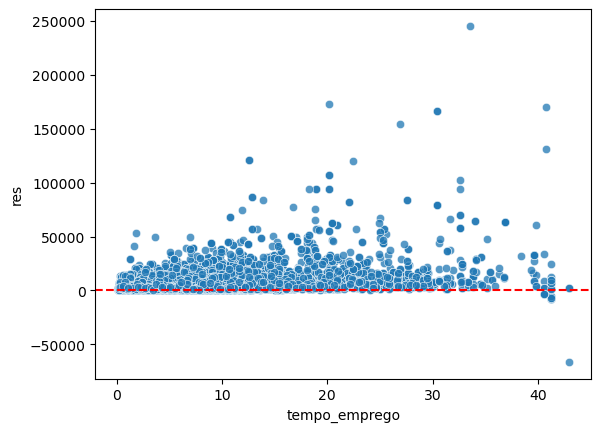

In [154]:
reg = smf.ols('renda ~ np.exp(tempo_emprego)', data = previsao_de_renda).fit()
print(reg.summary())
previsao_de_renda['res'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = previsao_de_renda, alpha = .75 )
plt.axhline(y=0, color='r', linestyle='--')

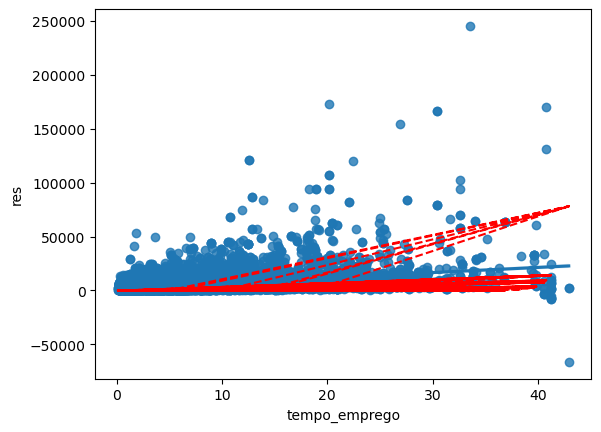

In [155]:
sns.regplot(x = 'tempo_emprego', y = 'res', data = previsao_de_renda)
plt.plot(previsao_de_renda['tempo_emprego'], reg.fittedvalues, 'r,--')

***Ao usar as regressões lineares simples apenas na varoável explicativa, o melhor resultado apresentado foi com o polinômio de segundo grau. Essa regressão conseguiu explicar cerca de 15,2% das relações entre as variáveis. Entretanto, essa regressão não conseguiu parametrizar as variâncias dos pontos.

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     2564.
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:10:19   Log-Likelihood:                -15150.
No. Observations:               12427   AIC:                         3.030e+04
Df Residuals:                   12425   BIC:                         3.032e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8384      0.011    699.851

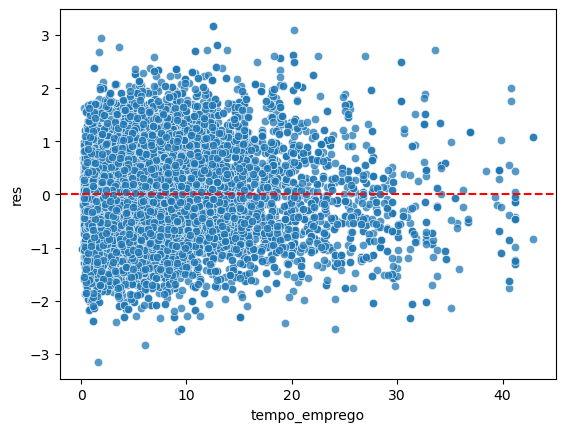

In [162]:
reg = smf.ols('np.log(renda) ~ tempo_emprego', data = previsao_de_renda).fit()
print(reg.summary())
previsao_de_renda['res'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = previsao_de_renda, alpha = .75 )
plt.axhline(y=0, color='r', linestyle='--')

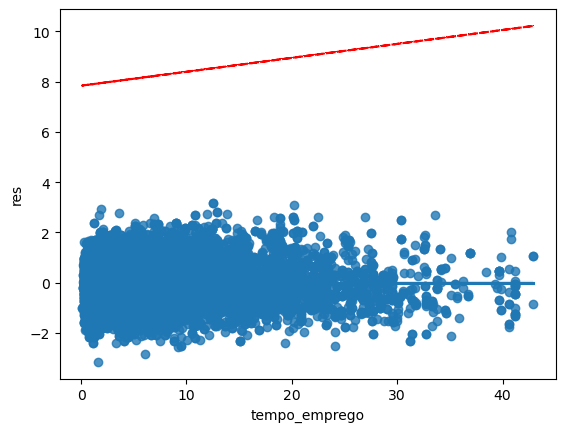

In [163]:
sns.regplot(x = 'tempo_emprego', y = 'res', data = previsao_de_renda)
plt.plot(previsao_de_renda['tempo_emprego'], reg.fittedvalues, 'r,--')

                                  OLS Regression Results                                 
Dep. Variable:     I(renda + np.power(renda, 2))   R-squared:                       0.040
Model:                                       OLS   Adj. R-squared:                  0.040
Method:                            Least Squares   F-statistic:                     513.7
Date:                           Thu, 13 Apr 2023   Prob (F-statistic):          1.77e-111
Time:                                   13:12:39   Log-Likelihood:            -2.7420e+05
No. Observations:                          12427   AIC:                         5.484e+05
Df Residuals:                              12425   BIC:                         5.484e+05
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------

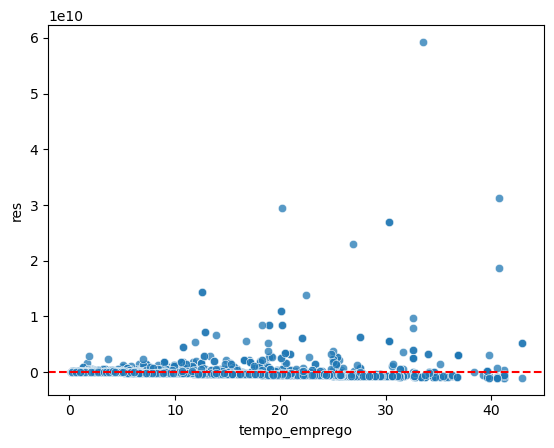

In [165]:
reg = smf.ols('I(renda + np.power(renda,2)) ~ tempo_emprego', data = previsao_de_renda).fit()
print(reg.summary())
previsao_de_renda['res'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = previsao_de_renda, alpha = .75 )
plt.axhline(y=0, color='r', linestyle='--')

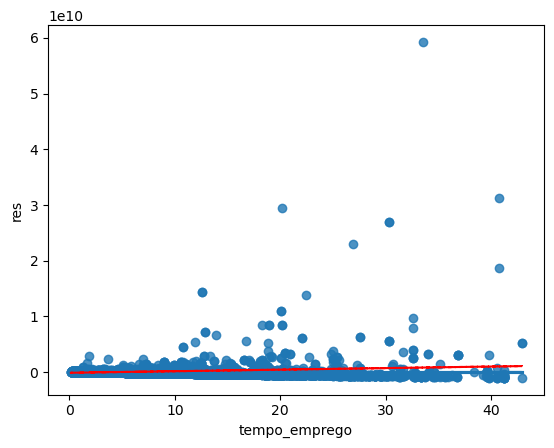

In [166]:
sns.regplot(x = 'tempo_emprego', y = 'res', data = previsao_de_renda)
plt.plot(previsao_de_renda['tempo_emprego'], reg.fittedvalues, 'r,--')

***Ao usar as regressões lineares simples apenas na varoável resposta, o melhor resultado apresentado foi com a função logarítmica. Essa regressão conseguiu explicar cerca de 17,1% das relações entre as variáveis. Essa regressão conseguiu parametrizar as variâncias dos pontos, demonstrando uma certa homogeneidade.

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     2069.
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:17:20   Log-Likelihood:                -15359.
No. Observations:               12427   AIC:                         3.072e+04
Df Residuals:                   12425   BIC:                         3.074e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.71

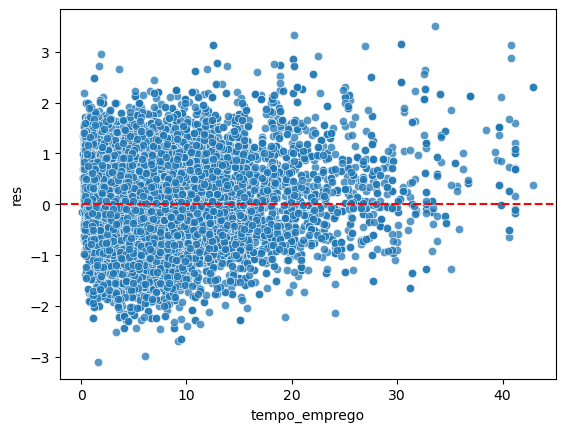

In [167]:
reg = smf.ols('np.log(renda) ~ np.log(tempo_emprego)', data = previsao_de_renda).fit()
print(reg.summary())
previsao_de_renda['res'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = previsao_de_renda, alpha = .75 )
plt.axhline(y=0, color='r', linestyle='--')

**A utilização da função logaritmica nas duas abcsissas não melhorou o resultado dos coeficentes.

3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [134]:
reg = smf.ols('renda ~ sexo + posse_de_imovel + tempo_emprego + posse_de_veiculo + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + qt_pessoas_residencia + 1', data = previsao_de_renda).fit()
previsao_de_renda['res'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     178.0
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:16:28   Log-Likelihood:            -1.2879e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12402   BIC:                         2.578e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -5626.6247   2500.235     -2.250      0.024   -1.05e+04    -725.776
sexo[T.M]                         6052.8592    155.859     38.836      0.000    5747.352    6358.367
posse_de_imovel[T.True]            366.5747    148.723      2.465      0.014      75.054     658.095
posse_de_veiculo[T.True]            48.9098    150.374      0.325      0.745    -245.846     343.666
tipo_renda[T.Bolsista]           -1357.7175   2564.833     -0.529      0.597   -6385.188    3669.753
tipo_renda[T.Empresário]           823.1460    158.826      5.183      0.000     511.822    1134.470
tipo_renda[T.Pensionista]        -2682.6331   2565.489     -1.046      0.296   -7711.391    2346.125
tipo_renda[T.Servidor público]     137.0942    236.327      0.580      0.562    -326.143     600.332
educacao[T.Pós graduação]         1090.5064   1690.396      0.645      0.519   -2222.932    4403.945
educacao[T.Secundário]             607.3280    765.686      0.793      0.428    -893.536    2108.192
educacao[T.Superior completo]     1225.5587    768.564      1.595      0.111    -280.947    2732.064
educacao[T.Superior incompleto]    220.4722    827.097      0.267      0.790   -1400.767    1841.712
estado_civil[T.Separado]          1161.1096   1182.969      0.982      0.326   -1157.693    3479.912
estado_civil[T.Solteiro]           819.9016   1158.206      0.708      0.479   -1450.362    3090.165
estado_civil[T.União]             -475.3334    267.717     -1.776      0.076   -1000.101      49.434
estado_civil[T.Viúvo]             1053.5626   1229.396      0.857      0.391   -1356.245    3463.370
tipo_residencia[T.Casa]           -298.3088    575.821     -0.518      0.604   -1427.008     830.390
tipo_residencia[T.Com os pais]    -388.7990    641.844     -0.606      0.545   -1646.914     869.316
tipo_residencia[T.Comunitário]    -459.8284   1120.521     -0.410      0.682   -2656.224    1736.567
tipo_residencia[T.Estúdio]          77.2381   1056.186      0.073      0.942   -1993.051    2147.527
tipo_residencia[T.Governamental]    73.8042    701.702      0.105      0.916   -1301.641    1449.249
tempo_emprego                      554.7551     11.044     50.230      0.000     533.107     576.404
qtd_filhos                       -1126.6107   1147.916     -0.981      0.326   -3376.703    1123.482
idade                               42.0025      8.517      4.931      0.000      25.307      58.698
qt_pessoas_residencia             1269.8493   1145.868      1.108      0.268    -976.229    3515.928
==============================================================================
Omnibus:                    17568.773   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9884998.164
Skew:             

In [169]:
reg = smf.ols('renda ~ sexo + posse_de_imovel + tempo_emprego + idade + 1', data = previsao_de_renda).fit()
previsao_de_renda['res'] = reg.resid
reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     1047.
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:19:39   Log-Likelihood:            -1.2882e+05
No. Observations:               12427   AIC:                         2.577e+05
Df Residuals:                   12422   BIC:                         2.577e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -2121.6370    329.140     -6.446      0.000   -2766.803   -1476.471
sexo[T.M]                6045.7894    145.591     41.526      0.000    5760.409    6331.169
posse_de_imovel[T.True]   394.7377    145.657      2.710      0.007     109.228     680.247
tempo_emprego             550.4590     10.903     50.485      0.000     529.087     571.831
idade                      37.5533      7.838      4.791      0.000      22.189      52.918
==============================================================================
Omnibus:                    17506.453   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9670624.952
Skew:                           8.073   Prob(JB):                         0.00
Kurtosis:                     138.705   Cond. No.                         206.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

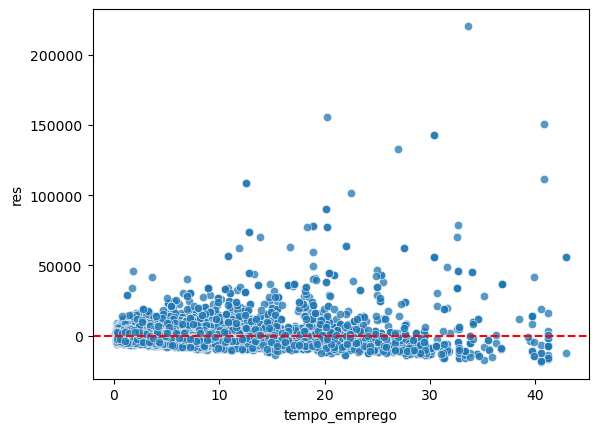

In [139]:
sns.scatterplot(x = 'tempo_emprego', y = 'res', data = previsao_de_renda, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

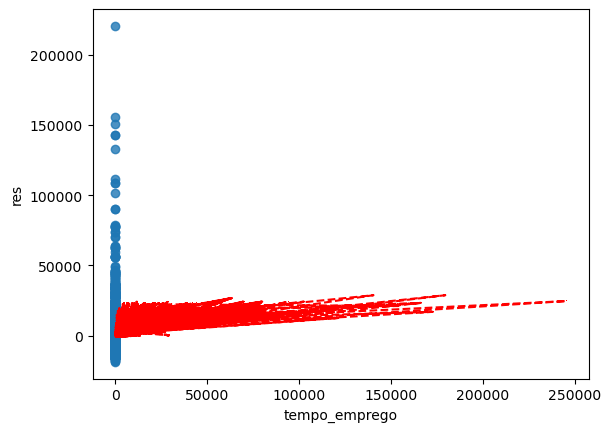

In [141]:
sns.regplot(x = 'tempo_emprego', y = 'res', data = previsao_de_renda)
plt.plot(previsao_de_renda['tempo_emprego'], reg.fittedvalues, 'r,--')

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     1637.
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:25:13   Log-Likelihood:                -13685.
No. Observations:               12427   AIC:                         2.738e+04
Df Residuals:                   12422   BIC:                         2.742e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

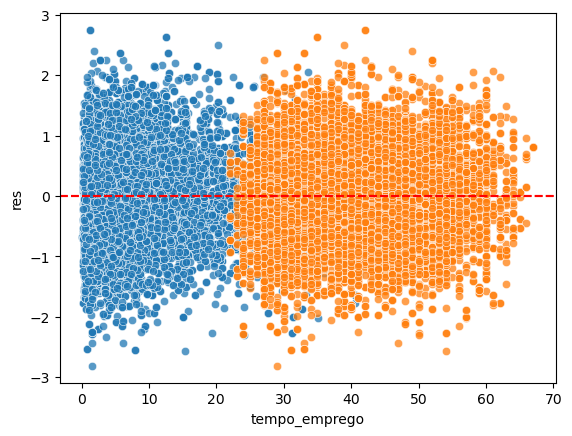

In [179]:
reg = smf.ols('np.log(renda) ~ sexo + posse_de_imovel + tempo_emprego + idade + 1', data = previsao_de_renda).fit()
previsao_de_renda['res'] = reg.resid
print(reg.summary())
sns.scatterplot(x = 'tempo_emprego', y = 'res', data = previsao_de_renda, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')
sns.scatterplot(x = 'idade', y = 'res', data = previsao_de_renda, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')




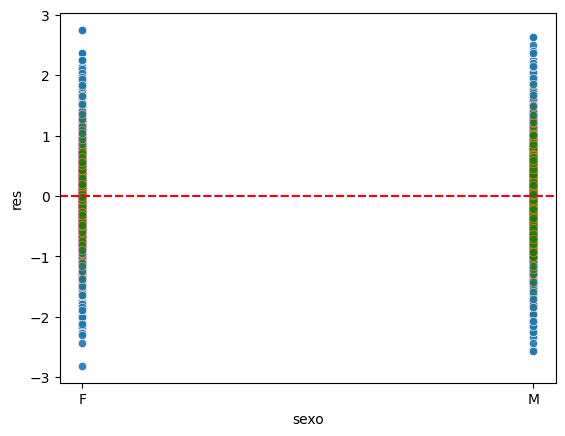

In [189]:
sns.scatterplot(x = 'sexo', y = 'res', data = previsao_de_renda, alpha = .90)
plt.axhline(y=0, color='b', linestyle='--')
sns.scatterplot(x = 'posse_de_imovel', y = 'res', data = previsao_de_renda, alpha = .005)
plt.axhline(y=0, color='r', linestyle='--')

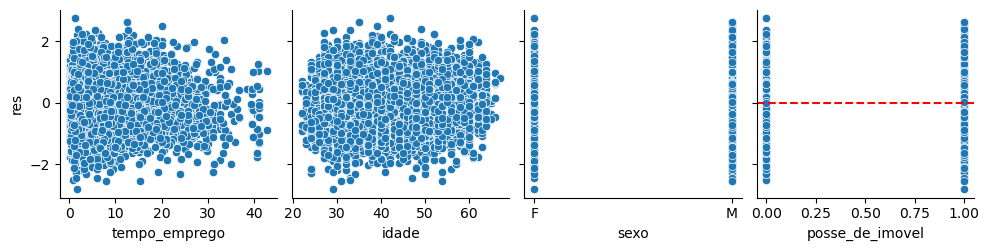

In [198]:
sns.pairplot(
    previsao_de_renda,
    x_vars=[ "tempo_emprego", "idade","sexo", "posse_de_imovel"],
    y_vars=["res"],
)
plt.axhline(y=0, color='r', linestyle='--')

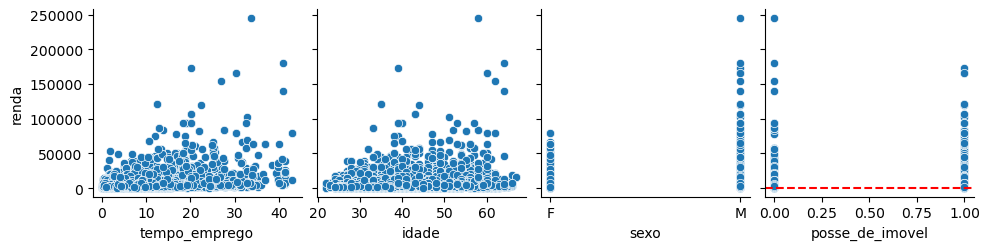

In [196]:
sns.pairplot(
    previsao_de_renda,
    x_vars=[ "tempo_emprego", "idade","sexo", "posse_de_imovel"],
    y_vars=["renda"],
)
plt.axhline(y=0, color='r', linestyle='--')

**Ao analisar os resíduos pode-se perceber que a variância entre os pontos está coerente e ocorreu um aumento considerável do R², anteriormente explicando apenas 17,1 % no melhor cenário contra 34,5% na regressão de múltiplas variáveis.